## 머신러닝
# 선형회귀 (Iris 꽃 데이터 분석)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Iris 데이터 불러오기
- 4가지 속성 : sepal length, sepal width, petal length, petal width
- 품종 : setosa, versicolor, virginica

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.data.shape

(150, 4)

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 문제 의식
- 해결하고 싶은 문제가 없으면 머신러닝은 무의미하다
- 즉, 머신러닝의 시작은 어떤 문제를 해결하고 싶은가 라는 질문에 있다
- 문제 예시
> 꽃잎 길이(petal length) 값으로 꽃잎 폭(petal width) 값을 예측하고 싶다

In [9]:
iris.data[:, 2:]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

Text(0, 0.5, 'petal width')

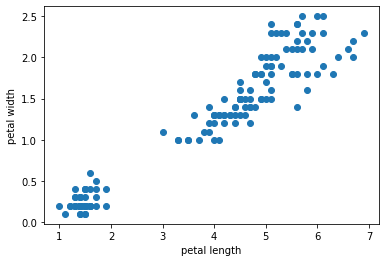

In [11]:
plt.scatter(iris.data[:, 2], iris.data[:, 3])
plt.xlabel('petal length')
plt.ylabel('petal width')

- 위 산점도에서 petal length 값이 2.5일 때, petal width 값은 얼마로 **예측**되나?
- 그렇게 예측한 이유는 무엇인가?
- 예측의 과정은 데이터가 가진 정보를 **단순화** 하는 것, 또는 숨은 **패턴**을 찾아내는 것과 관련이 있다

### 선형회귀 적용
- petal length 값과 petal width 값의 비례관계를 구한다
- 위의 산점도에서 가장 적합한 직선을 그린다 (직선이 바로 비례관계임)

In [4]:
### 입력값(근거가 되는 데이터)를 X, 목표값(맞추려는 값)을 y 로 두는게 일반적이다

X = iris.data[:, 2] # petal length 값을 가지고
y = iris.data[:, 3] # petal width 값을 맞춘다

In [14]:
X.shape, y.shape

((150,), (150,))

In [6]:
X

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

- 머신러닝의 규칙
> 입력값 X 는 반드시 2차원 표형태의 데이터를 사용한다

In [5]:
X = iris.data[:, 2].reshape(150,1) # 또는 iris.data[:, [2]]
y = iris.data[:, 3]

X.shape, y.shape

((150, 1), (150,))

In [8]:
X

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.4],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

In [9]:
y

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # 빈 모델을 하나 만든다

In [7]:
### 훈련
model.fit(X, y) # 빈 모델에 데이터를 입력해 훈련한다 (모델의 내부값이 조절됨)

LinearRegression()

In [8]:
### 데이터 활용 (예측/판단)
y_pred = model.predict(X) # 꽃잎길이를 넣어 꽃잎폭을 예측해 본다

- 훈련결과를 분석하자

In [19]:
y_pred

array([0.21898206, 0.21898206, 0.17740652, 0.2605576 , 0.21898206,
       0.34370869, 0.21898206, 0.2605576 , 0.21898206, 0.2605576 ,
       0.2605576 , 0.30213314, 0.21898206, 0.09425544, 0.13583098,
       0.2605576 , 0.17740652, 0.21898206, 0.34370869, 0.2605576 ,
       0.34370869, 0.2605576 , 0.0526799 , 0.34370869, 0.42685977,
       0.30213314, 0.30213314, 0.2605576 , 0.21898206, 0.30213314,
       0.30213314, 0.2605576 , 0.2605576 , 0.21898206, 0.2605576 ,
       0.13583098, 0.17740652, 0.21898206, 0.17740652, 0.2605576 ,
       0.17740652, 0.17740652, 0.17740652, 0.30213314, 0.42685977,
       0.21898206, 0.30213314, 0.21898206, 0.2605576 , 0.21898206,
       1.59097494, 1.50782385, 1.67412602, 1.29994614, 1.54939939,
       1.50782385, 1.59097494, 1.00891735, 1.54939939, 1.2583706 ,
       1.09206844, 1.38309723, 1.29994614, 1.59097494, 1.13364398,
       1.46624831, 1.50782385, 1.34152169, 1.50782385, 1.2583706 ,
       1.63255048, 1.29994614, 1.67412602, 1.59097494, 1.42467

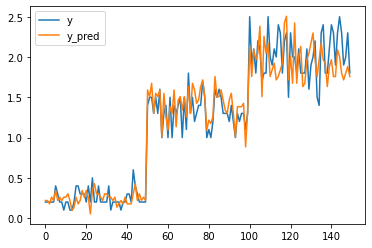

In [20]:
plt.plot(y)
plt.plot(y_pred)
plt.legend(['y', 'y_pred'])

### 머신러닝 모델의 훈련과 동물의 성장과정을 비교
- 머신러닝에는 선형회귀, 로지스틱회귀, SVM, 결정트리, 신경망 등 다양한 모델이 있다
- 이는 강아지, 고양이, 지렁이, 인간 등 다양한 동물이 존재하는 것과 같다
- 위의 머신러닝 과정은, 고양이 한 개체가 태어나 주변 환경과의 소통을 통해 어른 고양이가 되는 과정과 다르지 않다
- 즉, 아기고양이 한마리가 처음에 생성된 빈 선형회귀 모델이고, 훈련된 모델이 어른고양이에 해당하겠다

### 선형회귀 훈련 결과
- 처음엔 비어있던 모델 내부값이 조절된다
- model.coef_ 와 model.intercept_

In [21]:
model.coef_ # 가중치 (기울기)

array([0.41575542])

In [22]:
model.intercept_ # 절편값

-0.3630755213190291

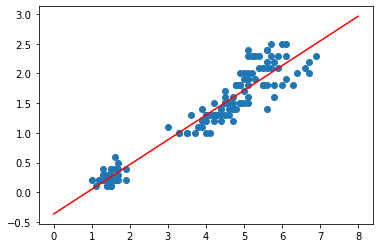

In [23]:
xs = np.array([0, 8])
ys = xs * model.coef_[0] + model.intercept_ # y_hat = X*W + b

plt.scatter(X.ravel(), y)
plt.plot(xs, ys, 'r-')

### 활용(예측) 방법
- 새로운 Iris 꽃을 따온다
- 자로 꽃잎길이를 재어 구축된 모델에 넣는다
- 출력된 예측값을 실제 꽃잎폭과 비교해 본다

In [9]:
model.predict([[2.5]]) # 새로운 꽃의 petal length 값이 2.5 인 경우

array([0.67631302])

### 새로운 문제
> 꽃받침길이, 꽃받침폭, 꽃잎길이 세가지 값을 가지고 꽃잎폭을 예측해 보자

In [14]:
X = iris.data[:, :3]
y = iris.data[:, 3]

X.shape, y.shape

((150, 3), (150,))

In [17]:
model = LinearRegression() # 빈모델 만들기
model.fit(X, y)            # 데이터를 넣어서 훈련하기
y_pred = model.predict(X)  # 예측하기 (활용하기, 맞추기, 판단하기)

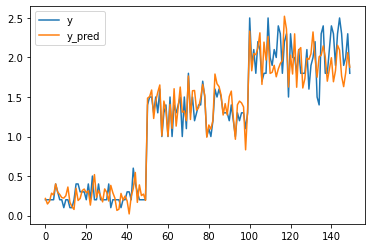

In [18]:
plt.plot(y)           # 실제값
plt.plot(y_pred)      # 예측값
plt.legend(['y', 'y_pred'])

In [19]:
model.coef_      # [w1, w2, w3] 기울기, 가중치

array([-0.20726607,  0.22282854,  0.52408311])

In [20]:
model.intercept_ # b

-0.24030738911225824

- 위의 결과를 산점도 상에 표시해 보자
- 예측선은 어떻게 그릴 수 있나? (그것은 선인가 평면인가?)

### 선형회귀 공식
> $$ \hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + b $$

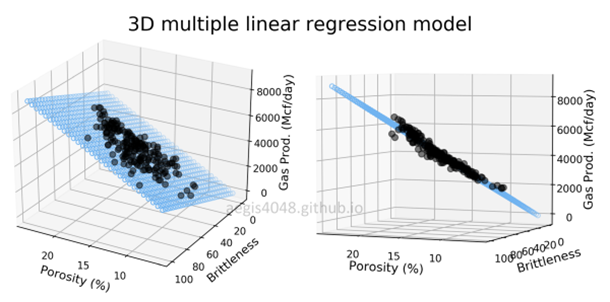

- 행렬(선형대수) 풀이
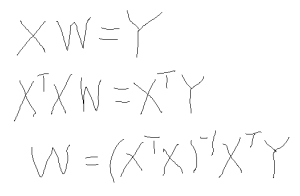

- 근사법 풀이
> - 최소제곱법(least squares) : https://en.wikipedia.org/wiki/Least_squares
> - 선형회귀에의 적용 : https://en.wikipedia.org/wiki/Linear_regression
> - 신경망에서의 오차/MSE/경사하강법/오차역전파법 을 적용한 풀이에 해당한다

Linear regression finds the parameters w and b that minimize the **mean squared error** between predictions and the true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values.